# Overview
In this notebook, we try out an active contouring demo we found on GitHub.  If it works, we'll try using it to augment our training images.

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [8]:
from PIL import Image

[0, 512, 512, 0]

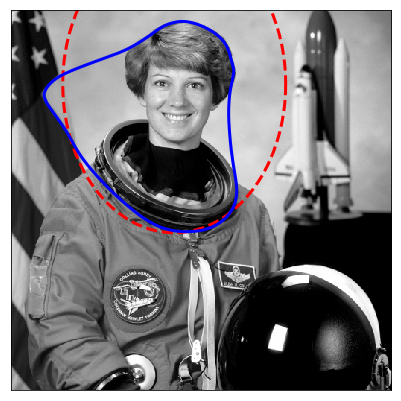

In [48]:
img = data.astronaut()
img = rgb2gray(img)

# generate 400 evenly spaced numbers between 0 and 2_pi.
s = np.linspace(0, 2*np.pi, 400)
# x sets the width of the red dashed circle (i.e. the bounding box)
x = 220 + 150*np.cos(s)
# y sets the height of the red dashed circle (i.e. the bounding box)
y = 100 + 200*np.sin(s)
# init is the "snake"
init = np.array([x, y]).T


# active_contour takes two arguments: image and snake.  Below, we apply gaussian smoothing
# to the image.  The snake is the 400x400 init matrix (np array).  Note the three
# hyperparameters specified at the end of the active_contour function.
snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
# below displays the image (of the astronaut)
ax.imshow(img, cmap=plt.cm.gray)
# below draws the red circle ('--r' indicates red)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# below draws the facial contour ('-b' indicates blue)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# below hides the tick marks
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

Note: this still doesn't (probably) solve the problem of finding cancer in an image; best case, it will find distinct shapes (hopefully distinct regions; gaussian smoothing could help with this by blending individual cells together into larger continuous regions/shapes).  But the question is whether those shapes correspond to cancerous regions.  I don't know; would have to try it on a bunch of images, get the results (images with outlines) and send to Joe.  

Another limitation seems to be that this approach can't generate multiple outlines; it seems to only generate a single outline per bounded area (is this true? if so, can it be updated? what approaches are used to find wood knots in images, when you don't know beforehand how many knots will be in a given image?...)